### Geospatial analysis with Python and R project
#### Bakhtiyar Garashov
#### Project is available [here](https://github.com/Bakhtiyar-Garashov/GeoPython2020/tree/master/geopython2020/GeoPython%20project)
#### Project idea
Within the scope of this project Airbnb dataset of Munich city is analyzed. Static maps of the number of accomodation and average price of staying per neighbourhood calculated. Also, dynamic/interactive map of each accomodation is shown via using folium library of Python. Below you can find the datasets and their source.
1. Listings.csv- contains extensive information about each accomodation. Has 75 attributes
2. Neighbourhoods.geojson- spatial dataset of neighbourhoods of Munich in WGS84
3. 3 different basemaps for interactive map
#### All the data can be found on this [url](http://insideairbnb.com/get-the-data.html)

### Problem 1. Creating the map on classification of the number of accomodations per neighbourhood of Munich




In [1]:
# necessary library imports for project
import pandas as pd
import geopandas as gpd
import pysal.viz.mapclassify as mc
import collections

from shapely.geometry import Point
#for scale bar
from matplotlib_scalebar.scalebar import ScaleBar

# custom legend and map
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# importing neighbourhoods of Munich geojson dataset 
munich_neighbourhoods="neighbourhoods.geojson"
munich_gdf=gpd.read_file(munich_neighbourhoods)
munich_gdf

,neighbourhood,neighbourhood_group,geometry
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48..."
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48..."
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48..."
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48..."
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48..."
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48..."
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48..."
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48..."
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48..."
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48..."


In [3]:
# importing all the airbnb list
all_list="listings.csv"
airbnb_listing= pd.read_csv(all_list)

airbnb_gdf=gpd.GeoDataFrame(airbnb_listing, geometry=gpd.points_from_xy(airbnb_listing.longitude,airbnb_listing.latitude))
airbnb_gdf

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,97945,https://www.airbnb.com/rooms/97945,20201026064122,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,9.0,9.0,NaN,f,2,2,0,0,1.21,POINT (11.48782 48.11476)
1,170154,https://www.airbnb.com/rooms/170154,20201026064122,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,10.0,10.0,NaN,f,1,0,1,0,4.30,POINT (11.52733 48.10751)
2,170815,https://www.airbnb.com/rooms/170815,20201026064122,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,814793,https://www.airbnb.com/users/show/814793,...,9.0,9.0,NaN,f,1,1,0,0,0.57,POINT (11.54154 48.16132)
3,171749,https://www.airbnb.com/rooms/171749,20201026064122,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,819382,https://www.airbnb.com/users/show/819382,...,10.0,10.0,NaN,t,1,0,1,0,3.15,POINT (11.57843 48.10583)
4,172672,https://www.airbnb.com/rooms/172672,20201026064122,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,823913,https://www.airbnb.com/users/show/823913,...,10.0,10.0,NaN,f,2,1,1,0,2.72,POINT (11.56366 48.16341)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,46025001,https://www.airbnb.com/rooms/46025001,20201026064122,2020-10-26,München Zuhause mit Aussicht 22,Stay stylish - das Motto der Marke Rilano 24|7...,"In der Parkstadt Schwabing, auch ""Silicon Schw...",https://a0.muscache.com/pictures/miso/Hosting-...,364189334,https://www.airbnb.com/users/show/364189334,...,NaN,NaN,NaN,t,23,0,23,0,NaN,POINT (11.59589 48.18420)
4690,46025035,https://www.airbnb.com/rooms/46025035,20201026064122,2020-10-26,München Zuhause mit Aussicht 23,Stay stylish - das Motto der Marke Rilano 24|7...,"In der Parkstadt Schwabing, auch ""Silicon Schw...",https://a0.muscache.com/pictures/miso/Hosting-...,364189334,https://www.airbnb.com/users/show/364189334,...,NaN,NaN,NaN,t,23,0,23,0,NaN,POINT (11.59590 48.18446)
4691,46033008,https://www.airbnb.com/rooms/46033008,20201026064122,2020-10-26,"Schöne, helle Wohnung mit Terrasse","Ich vermiete meine super schöne, helle 2 Zimme...",NaN,https://a0.muscache.com/pictures/af389bf3-a320...,18190559,https://www.airbnb.com/users/show/18190559,...,NaN,NaN,NaN,f,1,1,0,0,NaN,POINT (11.57780 48.11368)
4692,46034397,https://www.airbnb.com/rooms/46034397,20201026064122,2020-10-26,Hanin Room,NaN,NaN,https://a0.muscache.com/pictures/f6876bee-6315...,365628095,https://www.airbnb.com/users/show/365628095,...,NaN,NaN,NaN,t,2,2,0,0,NaN,POINT (11.56165 48.13728)


In [4]:
def check_contain(row):
    count=0
    for each_point in airbnb_gdf.geometry:
        if row["geometry"].contains(each_point):
            count+=1
    
    return count
        
        
munich_gdf['count_data'] = munich_gdf.apply(check_contain, axis=1)

munich_gdf


,neighbourhood,neighbourhood_group,geometry,count_data
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107


In [5]:
# data classification (Natural breaks)

n_classes = 6

classifier = mc.NaturalBreaks.make(k=n_classes)

munich_gdf['amount_class'] = munich_gdf[['count_data']].apply(classifier)

munich_gdf

,neighbourhood,neighbourhood_group,geometry,count_data,amount_class
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160,2
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533,5
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363,4
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318,4
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279,4
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158,2
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178,2
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158,2
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287,4
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107,1


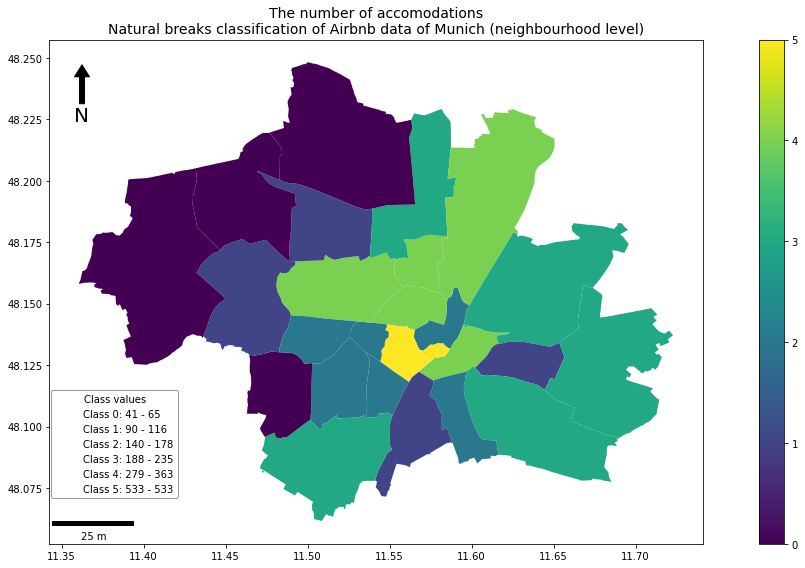

In [6]:
# data visualization

# add values of each class as legend
# reference https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html
grouped = munich_gdf.groupby('amount_class')
legend_dict = collections.OrderedDict([])
for cl, valds in grouped:
    minv = valds['count_data'].min()
    maxv = valds['count_data'].max()
    legend_dict.update({"Class {}: {} - {}".format(cl, minv, maxv): "white"})

patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)



# visualize map

fig, ax = plt.subplots(figsize=(16, 8))

scalebar = ScaleBar(500,location="lower left",height_fraction=0.01) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)

munich_gdf.plot(ax=ax,column="amount_class",lw=0.7,legend=True)
plt.legend(handles=patchList, loc='lower center', bbox_to_anchor=(0.1, 0.08), ncol=1,title='Class values',edgecolor="gray")
# adding north arrow to map
x, y, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

plt.title("The number of accomodations\nNatural breaks classification of Airbnb data of Munich (neighbourhood level)", y=1, fontsize=14)
plt.tight_layout()


plt.savefig('../airbnb_natural_breaks.png', bbox_inches='tight')


### Problem 2. Creating the map on classification of the average price of accomodations per neighbourhood of Munich
Here I will modify the function from Problem 1 so that it will calculate average price of stay for each neighbourhood. And then values were classified and visualized.
Please note that as the function below uses nested for loop (iterating over each airbnb data for each row of neighbourhood dataframe) it takes a little bit long time to be executed. There would be another solution that is more efficient than this one in terms of time complexity.

In [7]:
# function that calculates average price

def calculate_average_price(row):
    count=0
    sum_price=0
    for index,each in airbnb_gdf.iterrows():
        if row["geometry"].contains(each["geometry"]):
            count+=1
            sum_price+=float(each["price"][1:].replace(',','')) # converting strings with $ and , chars into proper values 
    
    return round(sum_price/count)



munich_gdf['average_price'] = munich_gdf.apply(calculate_average_price, axis=1)

munich_gdf

,neighbourhood,neighbourhood_group,geometry,count_data,amount_class,average_price
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160,2,156
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533,5,159
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363,4,146
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318,4,108
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279,4,119
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158,2,118
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178,2,97
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158,2,137
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287,4,98
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107,1,80


In [8]:
# data classification (Natural breaks)

n_classes = 6

classifier = mc.NaturalBreaks.make(k=n_classes)

munich_gdf['price_class'] = munich_gdf[['average_price']].apply(classifier)

munich_gdf




,neighbourhood,neighbourhood_group,geometry,count_data,amount_class,average_price,price_class
0,Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",160,2,156,5
1,Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",533,5,159,5
2,Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",363,4,146,4
3,Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",318,4,108,2
4,Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",279,4,119,3
5,Sendling,None,"MULTIPOLYGON (((11.55290 48.10600, 11.55180 48...",158,2,118,3
6,Sendling-Westpark,None,"MULTIPOLYGON (((11.53790 48.12650, 11.53770 48...",178,2,97,1
7,Schwanthalerhöhe,None,"MULTIPOLYGON (((11.53460 48.14250, 11.53880 48...",158,2,137,4
8,Neuhausen-Nymphenburg,None,"MULTIPOLYGON (((11.54810 48.17080, 11.55010 48...",287,4,98,1
9,Moosach,None,"MULTIPOLYGON (((11.53300 48.18870, 11.53470 48...",107,1,80,0


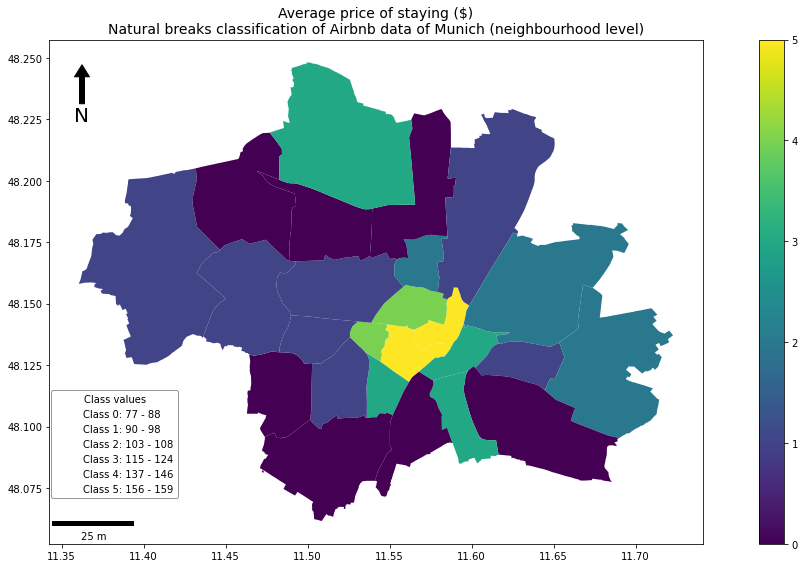

In [9]:
# data visualization
# add values of each class as legend
# reference https://kodu.ut.ee/~kmoch/geopython2020/L4/reclassify.html
grouped = munich_gdf.groupby('price_class')
legend_dict = collections.OrderedDict([])
for cl, valds in grouped:
    minv = valds['average_price'].min()
    maxv = valds['average_price'].max()
    legend_dict.update({"Class {}: {} - {}".format(cl, minv, maxv): "white"})

patchList = []
for key in legend_dict:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)



# visualize map

fig, ax = plt.subplots(figsize=(16, 8))

scalebar = ScaleBar(500,location="lower left",height_fraction=0.01) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)


munich_gdf.plot(ax=ax,column="price_class",lw=0.7,legend=True)
plt.legend(handles=patchList, loc='lower center', bbox_to_anchor=(0.1, 0.08), ncol=1,title='Class values',edgecolor="gray")
# adding north arrow to map
x, y, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)



plt.title("Average price of staying ($)\nNatural breaks classification of Airbnb data of Munich (neighbourhood level)", y=1, fontsize=14)

plt.tight_layout()


plt.savefig('../airbnb_avg_prices.png', bbox_inches='tight')

### Problem 3. Making an interactive map of Munich airbnb dataset by using Folium library

In [10]:
# importing necessary libraries
import folium
from folium.plugins import MarkerCluster

In [11]:
# before moving on showing points we need to filter all the dataset
# filter option #1: dataset has a column (instant_bookable) which has one of two possible columns- true or false
# filter option #2: dataset has a review_scores_rating column which holds values out of 100
# this column will be used to filter and show points only has true value

airbnb_filtered_gdf=airbnb_gdf.loc[airbnb_gdf['instant_bookable'] == 't']
airbnb_filtered_gdf=airbnb_filtered_gdf.loc[airbnb_filtered_gdf['review_scores_rating'] >90]

# and select only useful columns to reduce stress on code
airbnb_filtered_gdf=airbnb_filtered_gdf[['name', 'description','picture_url','property_type','price','review_scores_rating','geometry']]

airbnb_filtered_gdf

,name,description,picture_url,property_type,price,review_scores_rating,geometry
3,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,https://a0.muscache.com/pictures/88ca5688-2b45...,Private room in apartment,$30.00,98.0,POINT (11.57843 48.10583)
10,Beautiful Attic Floor Dwelling,<b>The space</b><br />Phantastic and bright to...,https://a0.muscache.com/pictures/2794055/6e2d7...,Entire apartment,$120.00,96.0,POINT (11.54618 48.13540)
21,Beautiful apartment in the heart of Munich,The about 40m2 on 2nd floor with elevator.<br ...,https://a0.muscache.com/pictures/00b68989-279d...,Entire apartment,$69.00,97.0,POINT (11.58564 48.15366)
22,* Munich-Schwabing- super- clean - central-room*,"Beautiful, comfortable, very ! cheap, quiet la...",https://a0.muscache.com/pictures/3039559/4b6b8...,Private room in apartment,$47.00,95.0,POINT (11.57150 48.15519)
23,* Munich- Schwabing- super pretty mini room *,Super pretty very small ! ! room. for privat...,https://a0.muscache.com/pictures/3038832/18456...,Private room in apartment,$37.00,96.0,POINT (11.56930 48.15517)
...,...,...,...,...,...,...,...
4587,Ruhiges Einzimmerappartment in Münchner Zentrum,Guten Tag und Servus zusammen:)<br />ich freue...,https://a0.muscache.com/pictures/c0c3299b-0d82...,Entire apartment,$48.00,100.0,POINT (11.50742 48.14211)
4603,A great place in central Munich,You are booking 2 guest rooms in the apartment...,https://a0.muscache.com/pictures/miso/Hosting-...,Private room in apartment,$55.00,100.0,POINT (11.57448 48.13489)
4608,❤️Modernes Single Apartment in Bestlage!!!❤️,KEIN WLAN vorhanden! <br />** All inklusive Mi...,https://a0.muscache.com/pictures/1913b51a-f360...,Entire apartment,$69.00,100.0,POINT (11.59281 48.14252)
4626,Komfortables Einzelzimmer in München-City,Freuen Sie sich in diesem Hotel auf stilvolle ...,https://a0.muscache.com/pictures/37338af7-34f4...,Room in hotel,$41.00,100.0,POINT (11.56078 48.13693)


In [12]:
# adding point dataset to map
# as we have more than 4k+ point objects, marker cluster is perfect way to load data without browser crash

def getPoints(row, geom):
    if isinstance(row[geom], Point):
        return (row[geom].y, row[geom].x)
    else:
        return ()

airbnb_filtered_gdf['latlon_tuple']=airbnb_filtered_gdf.apply(getPoints, geom='geometry', axis=1)

# base map 1
m = folium.Map(location=[48.132888, 11.581382], zoom_start=11, control_scale=True, prefer_canvas=True, width=1000, height=600)


munich_gdf["geoid"]=munich_gdf.index.astype(str)

munich_geojson=munich_gdf.to_json()

munich_geojson

#creating choropleth
folium.Choropleth(
geo_data=munich_geojson, #geojson
data=munich_gdf,
columns=['geoid','count_data'],
key_on="feature.id",
fill_opacity=0.5,
line_opacity=0.2,
line_color='white',
line_weight=0,
legend_name='Airbnb accommodations of Munich',
name='Neighbourhoods',
highlight=False,
fill_color="YlOrRd"
).add_to(m)




marker_cluster = MarkerCluster(fill_color='#2b8cbe',name="Airbnb accommodations",number_of_sides=6, radius=6).add_to(m)

folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.LayerControl().add_to(m)

for idx, point in airbnb_filtered_gdf.iterrows():
    # a small note about picture: although the dataset has actual images for each property, loading them on map takes ridiculously long time
    # that is why i am using a placeholder. if you want to try actual images use code below
    # pic_url=point['picture_url']
    pic_url='https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/suburban-house-royalty-free-image-1584972559.jpg'
    name=point['name'].replace('`',"'")
    desc=point['description']
    if isinstance(desc,str):
        desc=desc.replace('`',"'")
        desc=desc[:100] # take only first small portion of desc text
        
    folium.Marker(location=point['latlon_tuple'], popup="<img src={} alt='image loading...' width='150'>\n {} <hr> {} <hr> {} <hr> {} ".format(pic_url,name,desc,point['property_type'],point['price'])).add_to(marker_cluster)

outfp = "../airbnb_Munich.html"

m.save(outfp)
m